<a href="https://colab.research.google.com/github/kabirodavies/Data-Projects/blob/main/Housing_Market_California_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Study house price of single family residential property type in the State of California (CA) from 2018-01-01 to 2022.

## Importing Libraries

In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

# Load the data

*   Housing Market Data From Redfin.
*   Redfin is a real estate brokerage, meaning we have direct access to data from local multiple listing services, as well as insight from our real estate agents across the country.




In [3]:
house_url = 'https://redfin-public-data.s3.us-west-2.amazonaws.com/redfin_market_tracker/zip_code_market_tracker.tsv000.gz'

house_ori = pd.read_csv(house_url, compression='gzip', sep='\t', quotechar='"')
house = house_ori.copy()


# Exploratory Data Analysis

Running head gives us a peek of our dataset. Although this doesn’t really tell us much about our data besides showing us how the data looks like.

In [ ]:
house.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,...,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated
0,2022-01-01,2022-03-31,90,zip code,2,28652,f,Zip Code: 66431,NaN,Kansas,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Topeka, KS",45820,2022-09-11 14:46:03
1,2020-01-01,2020-03-31,90,zip code,2,35743,f,Zip Code: 83713,NaN,Idaho,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,"Boise City, ID",14260,2022-09-11 14:46:03
2,2017-11-01,2018-01-31,90,zip code,2,38464,f,Zip Code: 92705,NaN,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Anaheim, CA",11244,2022-09-11 14:46:03
3,2014-04-01,2014-06-30,90,zip code,2,8432,f,Zip Code: 21208,NaN,Maryland,...,0.026786,NaN,NaN,NaN,0.636364,0.454545,0.436364,"Baltimore, MD",12580,2022-09-11 14:46:03
4,2012-02-01,2012-04-30,90,zip code,2,39521,f,Zip Code: 95301,NaN,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Merced, CA",32900,2022-09-11 14:46:03


In [ ]:
house.shape

(6196869, 58)

# Data info
Calling info() on our dataset tells us tons of information about our data frame like the shape (rows, columns), the data type of our features, and the memory usage.

In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6196869 entries, 0 to 6196868
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   period_begin                    object 
 1   period_end                      object 
 2   period_duration                 int64  
 3   region_type                     object 
 4   region_type_id                  int64  
 5   table_id                        int64  
 6   is_seasonally_adjusted          object 
 7   region                          object 
 8   city                            float64
 9   state                           object 
 10  state_code                      object 
 11  property_type                   object 
 12  property_type_id                int64  
 13  median_sale_price               float64
 14  median_sale_price_mom           float64
 15  median_sale_price_yoy           float64
 16  median_list_price               float64
 17  median_list_price_mom      

# Data Type
Separating our features into numerical and categorical early on is useful.

In [ ]:
cat_df = house.select_dtypes(include=['object'])
num_df = house.select_dtypes(exclude=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
        
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
period_begin
period_end
region_type
is_seasonally_adjusted
region
state
state_code
property_type
parent_metro_region
last_updated

Numeric columns:
period_duration
region_type_id
table_id
city
property_type_id
median_sale_price
median_sale_price_mom
median_sale_price_yoy
median_list_price
median_list_price_mom
median_list_price_yoy
median_ppsf
median_ppsf_mom
median_ppsf_yoy
median_list_ppsf
median_list_ppsf_mom
median_list_ppsf_yoy
homes_sold
homes_sold_mom
homes_sold_yoy
pending_sales
pending_sales_mom
pending_sales_yoy
new_listings
new_listings_mom
new_listings_yoy
inventory
inventory_mom
inventory_yoy
months_of_supply
months_of_supply_mom
months_of_supply_yoy
median_dom
median_dom_mom
median_dom_yoy
avg_sale_to_list
avg_sale_to_list_mom
avg_sale_to_list_yoy
sold_above_list
sold_above_list_mom
sold_above_list_yoy
price_drops
price_drops_mom
price_drops_yoy
off_market_in_two_weeks
off_market_in_two_weeks_mom
off_market_in_two_weeks_yoy
parent_metro_region_metro_c

###### Seems like the 'period_begin', 'period_end', 'last_updated', and 'city' columns are in the wrong format.

###### Since this is a huge dataset with 6,196,869 rows and 58 columns, we will filter the data to only the State of California for the 'Single Family Residential' property_type' from 2018-01-01. 

## Data Cleaning

In [79]:
# convert the 'period_begin' and 'period_end columns to datetime format
house['period_begin'] = pd.to_datetime(house['period_begin'])
house['period_end'] = pd.to_datetime(house['period_end'])
house['last_updated'] = pd.to_datetime(house['last_updated'])

In [85]:
#Filter the dataframe to only look at single-family properties sold in California (CA) from 2021-01 to 2022-06-01
df_CA = house[(house['period_begin'] >='2020-01-01') & (house['property_type']=='Single Family Residential') & (house['homes_sold']>=20) & (house['state_code']=='CA')]

In [ ]:
# Check new shape
#(df_CA['homes_sold']>=20) &

In [86]:
df_CA.shape

(28296, 58)

In [7]:
# Check city column
df_CA['city'].isna().sum()

76000

City column seems to be missing all records, we'll drop it later after checking for other possible columns with similar properties

## Missing Data
Missing data is common in all kinds of data and is tricky to deal with. Most machine learning techniques do not work with missing values and it has to be addressed early on.

### The two common methods to deal with missing values are

1. Dropping the rows / columns
2. Imputing them based on other observations i.e. the mean or median

## Columns with missing values


In [87]:
def missing_cols(df):
    '''prints out columns with its amount of missing values'''
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df[col].isnull().sum()}")
    
    if total == 0:
        print("no missing values left")
            
missing_cols(df_CA)

city => 28296
median_sale_price_yoy => 15
median_list_price => 9
median_list_price_mom => 13
median_list_price_yoy => 49
median_ppsf_yoy => 15
median_list_ppsf => 9
median_list_ppsf_mom => 13
median_list_ppsf_yoy => 49
homes_sold_yoy => 15
pending_sales => 86
pending_sales_mom => 125
pending_sales_yoy => 245
new_listings => 9
new_listings_mom => 13
new_listings_yoy => 49
inventory => 27
inventory_mom => 47
inventory_yoy => 70
months_of_supply => 28296
months_of_supply_mom => 28296
months_of_supply_yoy => 28296
median_dom => 13
median_dom_mom => 18
median_dom_yoy => 65
avg_sale_to_list_yoy => 15
sold_above_list_yoy => 15
price_drops => 28296
price_drops_mom => 28296
price_drops_yoy => 28296
off_market_in_two_weeks => 86
off_market_in_two_weeks_mom => 125
off_market_in_two_weeks_yoy => 245


## Percentage missing

In [ ]:
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(df_CA)

city => 100.0%
median_sale_price_mom => 2.1%
median_sale_price_yoy => 5.79%
median_list_price => 3.49%
median_list_price_mom => 5.76%
median_list_price_yoy => 8.64%
median_ppsf => 0.11%
median_ppsf_mom => 2.21%
median_ppsf_yoy => 5.87%
median_list_ppsf => 3.53%
median_list_ppsf_mom => 5.79%
median_list_ppsf_yoy => 8.67%
homes_sold_mom => 2.1%
homes_sold_yoy => 5.79%
pending_sales => 12.25%
pending_sales_mom => 17.09%
pending_sales_yoy => 18.18%
new_listings => 3.49%
new_listings_mom => 5.76%
new_listings_yoy => 8.64%
inventory => 4.68%
inventory_mom => 6.83%
inventory_yoy => 9.45%
months_of_supply => 100.0%
months_of_supply_mom => 100.0%
months_of_supply_yoy => 100.0%
median_dom => 1.06%
median_dom_mom => 3.19%
median_dom_yoy => 6.86%
avg_sale_to_list => 0.02%
avg_sale_to_list_mom => 2.12%
avg_sale_to_list_yoy => 5.81%
sold_above_list_mom => 2.1%
sold_above_list_yoy => 5.79%
price_drops => 100.0%
price_drops_mom => 100.0%
price_drops_yoy => 100.0%
off_market_in_two_weeks => 12.25%
off_

## Heatmap of missing values


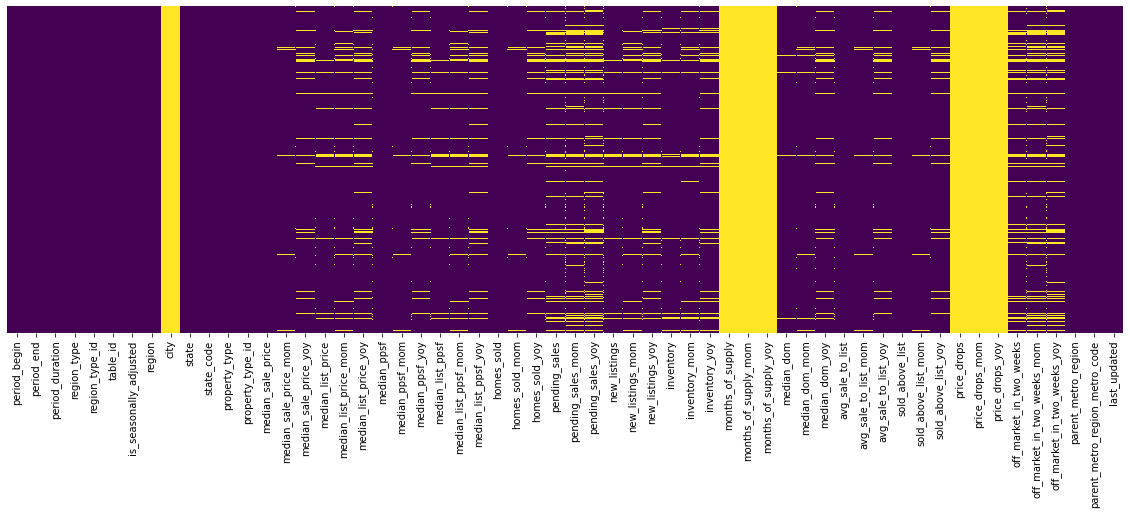

In [ ]:
# Heatmap of the entire dataset
plt.figure(figsize=(20, 6))
sns.heatmap(df_CA.isnull(), yticklabels=False, cmap='viridis', cbar=False)

Seems like we have a few columns missing 100% of the data including 'city' column. We'll drop the columns missing atleast 25% of the data.

In [88]:
# Drop unnecessary columns that are not important
df = df_CA.copy() # Make a copy
df.dropna(axis=1, thresh = int(0.25*df.shape[0]), inplace=True)

In [89]:
cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(exclude=['object'])

In [90]:
print("No. of Numeric Columns " + str(len(num_df.columns)))
print("No. of Categorical Columns " + str(len(cat_df.columns)))

No. of Numeric Columns 44
No. of Categorical Columns 7


For our clustering analysis, we don’t need all these columns. We are going to create clusters based on nine features so let’s only keep the fields that are of interest in our data frame using the following code.

In [91]:
#Select fields that are of interest
fields=[
'region',
'median_sale_price_yoy',
'median_list_price_yoy',
'median_list_ppsf_yoy',
'median_dom_yoy',
'homes_sold_yoy',
'new_listings_yoy',
'median_dom',
'avg_sale_to_list',
]

new_df = df[fields].set_index('region')

In [92]:
new_df.shape

(28296, 8)

In [93]:
# Replace string or empty values with nan
new_df = new_df.replace(r'^\s*$', np.NaN, regex=True)

In [94]:
new_df.to_csv("raw_df.csv")

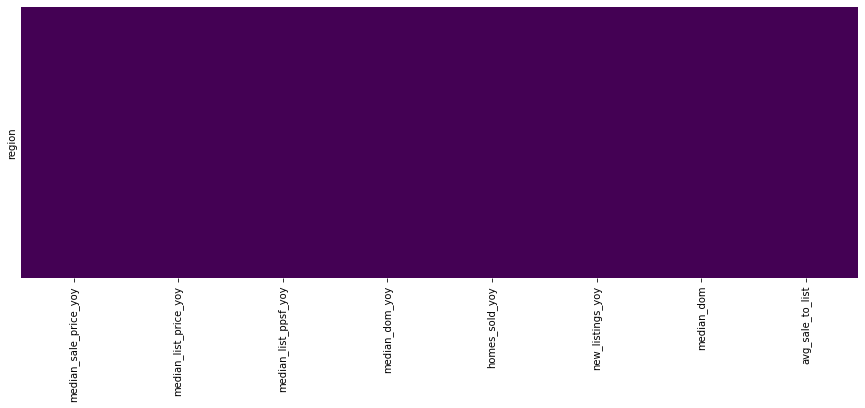

In [95]:
plt.figure(figsize=(15, 5))
sns.heatmap(new_df.isnull(), yticklabels=False, cmap='viridis', cbar=False)

Before dealing with the missing values, lets first check the dataset for outliers and treat them accordingly.

## Outliers
### Detecting Outliers
1. Boxplots
2. Z-score
3. Inter Quantile Range(IQR)

#### Detecting outlier using Inter Quantile Range(IQR)


In [125]:
len(new_df)

28296

In [ ]:
# Descriptive statistics
new_df.describe()

,median_sale_price_yoy,median_list_price_yoy,median_list_ppsf_yoy,median_dom_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list
count,71603.000000,69431.000000,69412.000000,70785.000000,71603.000000,69434.000000,75198.000000,75985.000000
mean,0.135753,0.118772,0.155925,-5.643067,0.254664,0.167462,47.478184,1.007669
std,0.455915,0.708248,14.032588,94.968145,3.201637,1.907540,76.356905,0.053709
min,-0.968829,-0.999436,-0.999751,-7371.000000,-0.966667,-0.944444,1.000000,0.555556
25%,0.019435,0.017430,0.021218,-14.500000,-0.194444,-0.183673,18.000000,0.985364
50%,0.093535,0.082391,0.079571,-2.500000,0.000000,0.000000,34.000000,1.000000
75%,0.189884,0.164450,0.157268,6.500000,0.250000,0.213333,54.000000,1.023161
max,40.844895,125.001260,3696.621582,7309.000000,210.000000,141.000000,7376.000000,1.967742


Describe shows some descriptive stats of the 41 numerical columns in the dataset.

In [96]:
# Function to plot Boxplot
def plot_boxplot(df, col):
  df.boxplot(column=[col])
  plt.grid(False)
  plt.show()

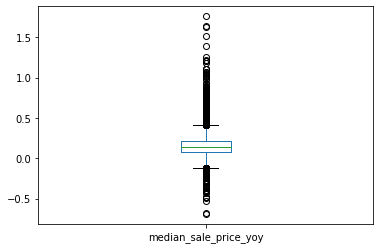

In [97]:
plot_boxplot(df, "median_sale_price_yoy")

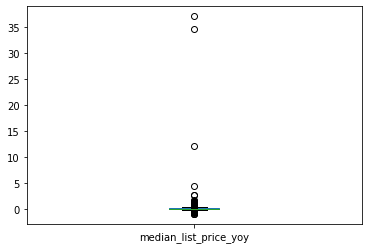

In [98]:
plot_boxplot(df, "median_list_price_yoy")

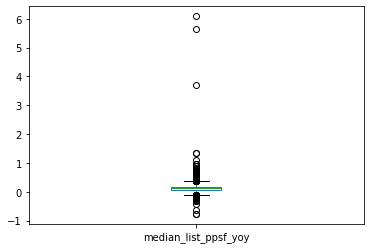

In [99]:
plot_boxplot(df, "median_list_ppsf_yoy")

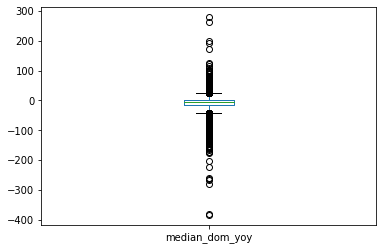

In [100]:
plot_boxplot(df, "median_dom_yoy")

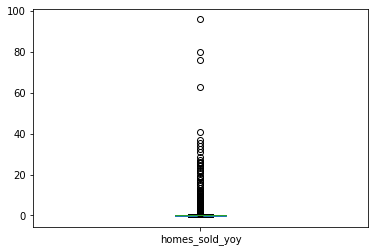

In [101]:
plot_boxplot(df, "homes_sold_yoy")

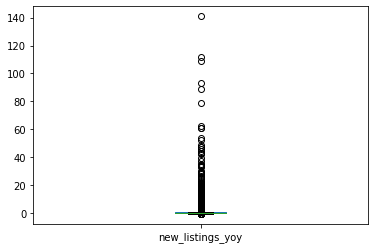

In [102]:
plot_boxplot(df, "new_listings_yoy")

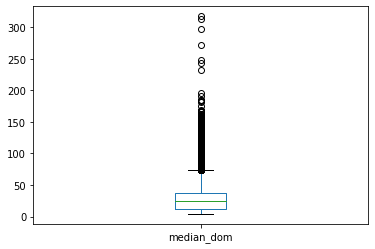

In [103]:
plot_boxplot(df, "median_dom")

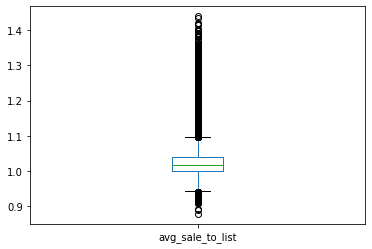

In [104]:
plot_boxplot(df, "avg_sale_to_list")

In [105]:
df = pd.read_csv('raw_df.csv')
df.shape

(28296, 9)

In [106]:
df.isna().sum()

region                    0
median_sale_price_yoy    15
median_list_price_yoy    49
median_list_ppsf_yoy     49
median_dom_yoy           65
homes_sold_yoy           15
new_listings_yoy         49
median_dom               13
avg_sale_to_list          0
dtype: int64

In [40]:
df.isnull().mean()*100


region                   0.000000
median_sale_price_yoy    5.785526
median_list_price_yoy    8.643421
median_list_ppsf_yoy     8.668421
median_dom_yoy           6.861842
homes_sold_yoy           5.785526
new_listings_yoy         8.639474
median_dom               1.055263
avg_sale_to_list         0.019737
dtype: float64

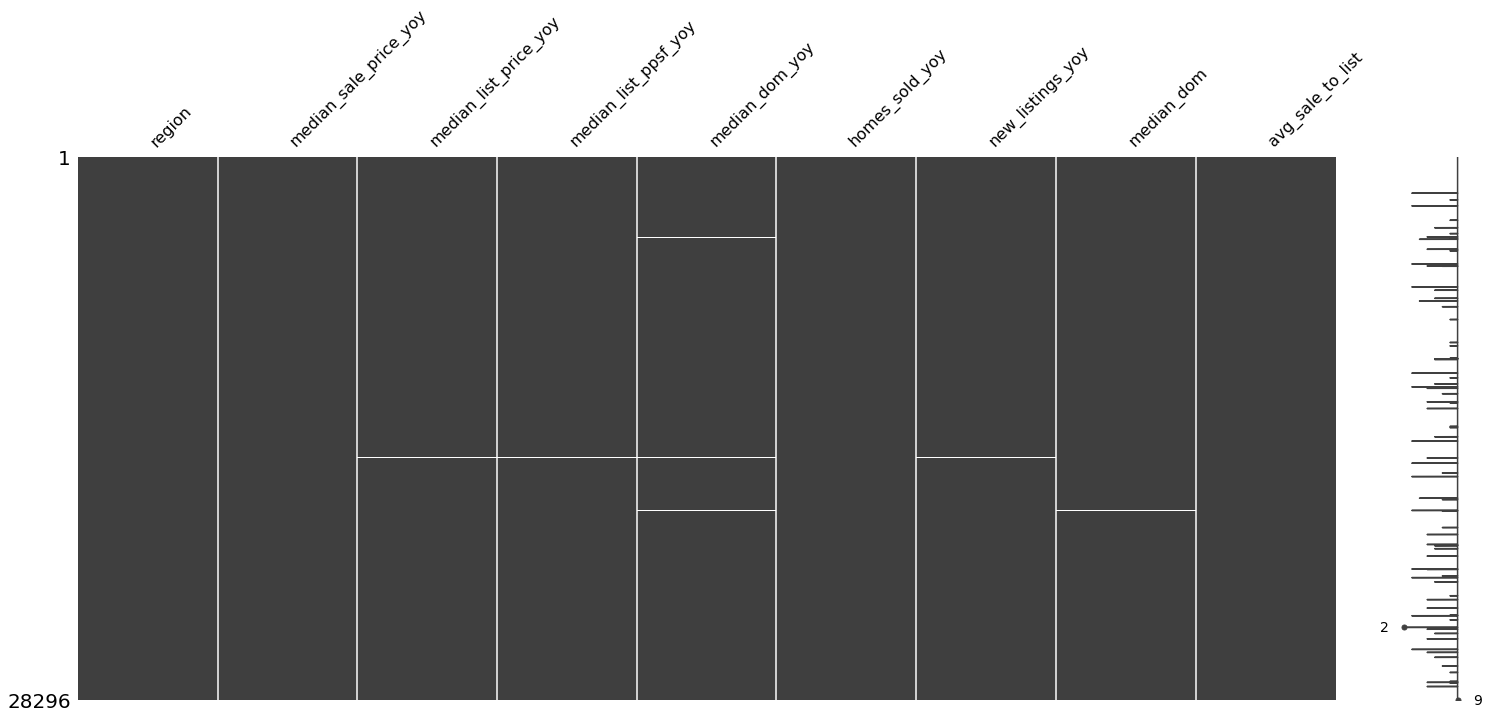

In [108]:
import missingno as msno

msno.matrix(df)

In [126]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = df.filter(['median_sale_price_yoy','median_list_price_yoy','median_list_ppsf_yoy','median_dom_yoy', 'homes_sold_yoy', 'new_listings_yoy', 'median_dom', 'avg_sale_to_list'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

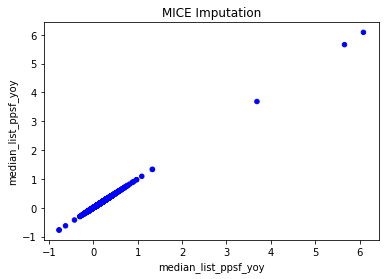

In [127]:

fig = plt.Figure()
null_values = df['median_list_ppsf_yoy'].isnull() 
fig = df_mice_imputed.plot(x='median_list_ppsf_yoy', y='median_list_ppsf_yoy', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

In [111]:
df_mice_imputed.isna().sum()

median_sale_price_yoy    0
median_list_price_yoy    0
median_list_ppsf_yoy     0
median_dom_yoy           0
homes_sold_yoy           0
new_listings_yoy         0
median_dom               0
avg_sale_to_list         0
dtype: int64

In [128]:
len(df_mice_imputed)

28296

In [20]:
# dfc = df.copy()
# dfc.dropna()
# dfc.shape

(76000, 9)

In [129]:
df_mice_imputed.shape

(28296, 8)

In [137]:
df_mice_imputed.describe()

,median_sale_price_yoy,median_list_price_yoy,median_list_ppsf_yoy,median_dom_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list
count,28296.000000,28296.000000,28296.000000,28296.000000,28296.000000,28296.000000,28296.000000,28296.000000
mean,0.150589,0.129791,0.127884,-9.050782,0.120482,0.170507,27.790937,1.027788
std,0.120294,0.330752,0.107836,18.122230,0.443995,2.228728,18.678594,0.046539
min,-0.692000,-0.928384,-0.770682,-384.000000,-0.747475,-1.942899,4.000000,0.878534
25%,0.077050,0.061549,0.064506,-16.000000,-0.165049,-0.173913,12.500000,1.000606
50%,0.141667,0.119461,0.121295,-6.000000,0.032450,0.004754,25.000000,1.017784
75%,0.209973,0.181984,0.183140,0.500000,0.288136,0.239437,37.000000,1.039479
max,1.758726,37.003839,6.084880,278.500000,4.833333,141.000000,136.500000,1.438470


In [136]:
df = df_mice_imputed

###Let’s treat the outliers for ‘median_dom’ and ‘homes_sold_yoy’ by capping the max value at the 99% percentile using the following code.

In [135]:
percentiles=df['median_dom'].quantile([0.00,0.99]).values
len(percentiles)

2

In [131]:
#Find the 99% percentile value in the 'median_dom' column
percentiles=df['median_dom'].quantile([0.00,0.99]).values
percentiles
#Replace the outlier with the 99% percentile value
df["median_dom"] = np.where(df["median_dom"] >=137, 53.039,df['median_dom'])


#Find the 99% value in the 'homes_sold_yoy' column
percentiles=df['homes_sold_yoy'].quantile([0.00,0.99]).values
percentiles
#Replace the outlier with the 99% percentile value
df["homes_sold_yoy"] = np.where(df["homes_sold_yoy"] >=5, 1.80475,df['homes_sold_yoy'])

In [144]:
def outliers(df, ft):
  # q1 = df[ft].quatile(0.25)
  # q3 = df[ft].quatile(0.75)
  q1, q3= np.percentile(df,[25,75])
  iqr = q3 - q1
  
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
  return ls

In [145]:
index_list = []
for feature in new_df.columns:
  index_list.extend(outliers(df_mice_imputed, feature))

In [146]:
len(index_list)

52637

In [119]:
# Remove outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df


In [120]:
df_cleaned = remove(df_mice_imputed, index_list)

In [121]:
df_cleaned.shape

(0, 8)

In [78]:
df_cleaned.head()

,median_sale_price_yoy,median_list_price_yoy,median_list_ppsf_yoy,median_dom_yoy,homes_sold_yoy,new_listings_yoy,median_dom,avg_sale_to_list


In [ ]:
#Find the 99% percentile value in the 'median_dom' column
percentiles=df['median_dom'].quantile([0.00,0.99]).values
percentiles
#Replace the outlier with the 99% percentile value
df["median_dom"] = np.where(df["median_dom"] >=137, 53.039,df['median_dom'])

#Find the 99% value in the 'homes_sold_yoy' column
percentiles=df['homes_sold_yoy'].quantile([0.00,0.99]).values
percentiles
#Replace the outlier with the 99% percentile value
df["homes_sold_yoy"] = np.where(df["homes_sold_yoy"] >=5, 1.80475,df['homes_sold_yoy'])

In [ ]:
quantile1, quantile3= np.percentile(new_df['avg_sale_to_list'],[25,75])

In [ ]:
print(quantile1,quantile3)

nan nan


In [ ]:
## Find the IQR
iqr_value=quantile3-quantile1
print(iqr_value)

nan


## Handling Outliers

1. Trimming/removing the outlier
2. Quantile based flooring and capping
3. Mean/Median imputation

## Technique to deal with missing values
1. Drop the feature
2. Drop the row
3. Impute the missing value
4. Replace it

## Spelling errors in categorical data


## Converting to DateTime

## Duplicates